# Анализ расходов на привлечение клиентов развлекательного приложения Procrastinate Pro+
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

### Описание данных
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

### Необходимо проанализировать:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Цели проекта:
- Выяснить причины неэффективности привлечения пользователей
- Сформулировать рекомендации для отдела маркетинга

### План работы:
1. Исследовательский анализ данных
Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
2. Маркетинг
Посчитать общую сумму расходов на маркетинг.
Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
Рассчитать сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
3. Оценить окупаемость рекламы
Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
Проверить конверсию пользователей и динамику её изменения. 
Проанализировать окупаемость рекламы с разбивкой по устройствам, странам и рекламным каналам.
4. Выводы
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
Указать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.



### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')  # визиты
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')  # заказы
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')  # расходы

display(visits.head(10))
display(orders.head(10))
costs.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Изменяем наименование столбцов

In [3]:
visits.columns=[x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns=[x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns=[x.lower().replace(' ', '_') for x in costs.columns.values]

Знакомимся с общей информацией о датафреймах, необходимо изменить тип данных в столбцах с датами

In [4]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Преобразуем данные о времени во всех датафреймах

In [5]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [6]:
costs.describe().T


,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0


Проверка пропущеных значений: пропущенных значений нет

In [7]:
display(visits.isna().sum())
display(costs.isna().sum())
orders.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

Проверка наличия явных дубликатов: дубликатов нет

In [8]:
display(visits.duplicated().sum())
display(costs.duplicated().sum())
orders.duplicated().sum()

0

0

0

**Выводы:**
 Загрузили данные, выполнили проверку, пропуски и дубликаты отсутствуют, преобразованны типы данных времени для возможности корректного анализа. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [17]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [18]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [19]:
display(profiles['first_ts'].min())
profiles['first_ts'].max()

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

Преобразовали с помощью функций файл с профилями пользователей, в нашем распоряжении данные за период с 01.05.2019 по 27.10.2019

Визуализировали соотношение платящих и непплатящих пользователей в разрезе региона, устройств и канала привлечения

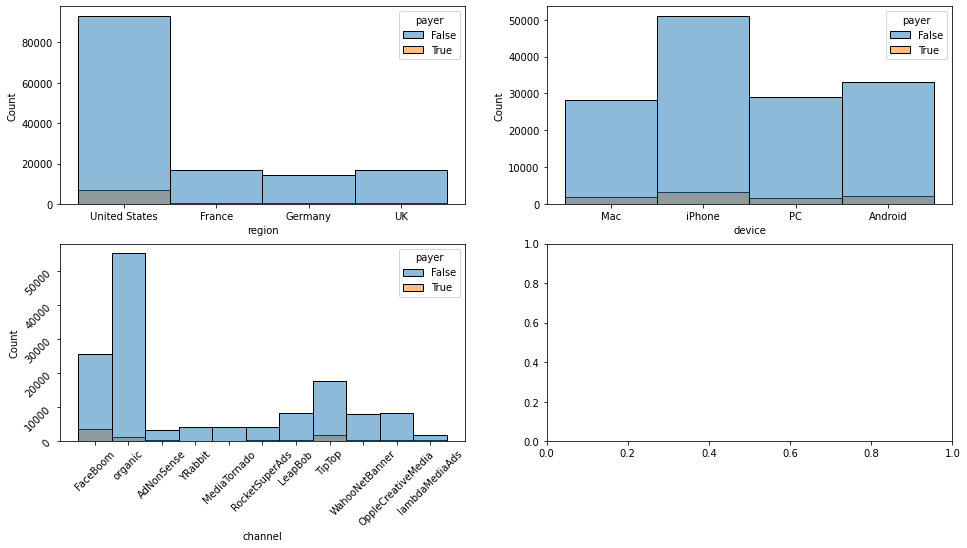

In [20]:
num_cols=['region', 'device', 'channel']
payment_category = 'payer'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/2), i%2]
    sns.histplot(profiles, x=col, ax=ax, hue=payment_category) 
ax.tick_params(labelrotation=45)

In [21]:
costs.pivot_table(
index='channel', values='costs', aggfunc='sum'
)

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Функции для определения долей платящих пользователей от общего количества и визуализация распределения среди платящих пользователей в разрезе стран, устройств и каналов привлечения:

In [22]:
def payer_sort(column):
        result = profiles.groupby(column).agg({'user_id': 'count', 'payer':'mean'}).sort_values(by='payer', ascending=False)      
        return result

In [23]:
def payer_pie(column):
        pie = profiles.groupby(column).agg({'payer':'count', 'payer': 'sum', }).plot(kind='pie', y='payer', autopct='%1.0f%%', figsize=(16, 8))
        plt.title('Распределение среди платящих пользователей')
        return pie

США является лидером не только по количеству пользователей, но и демонстрирует лучший показатель по доле платящих пользователей среди них: 6.9%, в остальных странах доли примерно одинаковые в диапазоне от 3,7 до 4,1%

In [24]:
payer_sort('region')

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Таким образом получается, что 78% платящих пользователей из США

<AxesSubplot:title={'center':'Распределение среди платящих пользователей'}, ylabel='payer'>

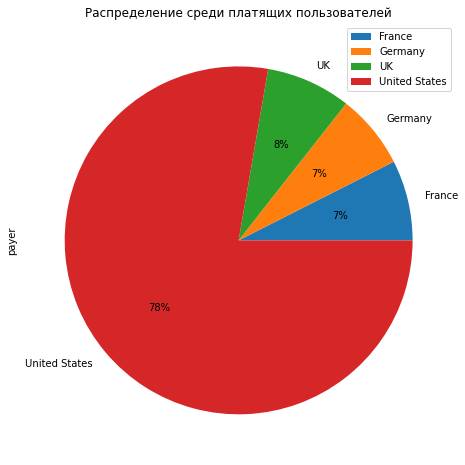

In [25]:
payer_pie('region')

Доли платящих пользователей в разрезе устройств распределены достаточно равномерно, доля платящих находится в диапазоне от 5 до 6,3% от общего количества пользователей

In [26]:
payer_sort('device')

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


38% платящих пользователей ипользуют iPhone, учитывая долю Mac, получается устройства Apple охватывают 60% платящих пользователей

<AxesSubplot:title={'center':'Распределение среди платящих пользователей'}, ylabel='payer'>

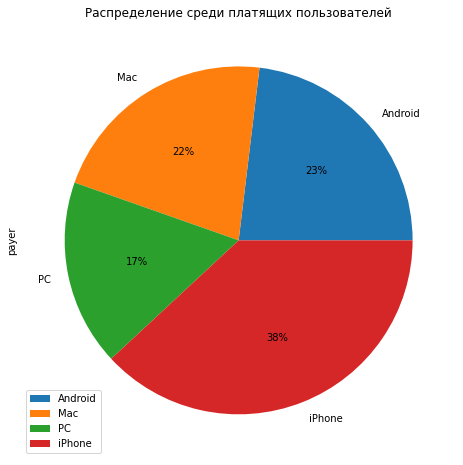

In [27]:
payer_pie('device')

Что касается распределения по каналам привлечени, то самым эффективным источником по привлечению платящих польхователей является FaceBoom, более 12% пользователей пришедших в приложение из этого приложения оплатили заказ. Лидер по количеству привлеченных пользователей TipTop только на 4 месте с долей 10,4%

In [28]:
payer_sort('channel')

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


40% всех платящих пользователей пришли из FaceBoom, TipTop - 21% и на третьем месте органические пользователи - 13%

<AxesSubplot:title={'center':'Распределение среди платящих пользователей'}, ylabel='payer'>

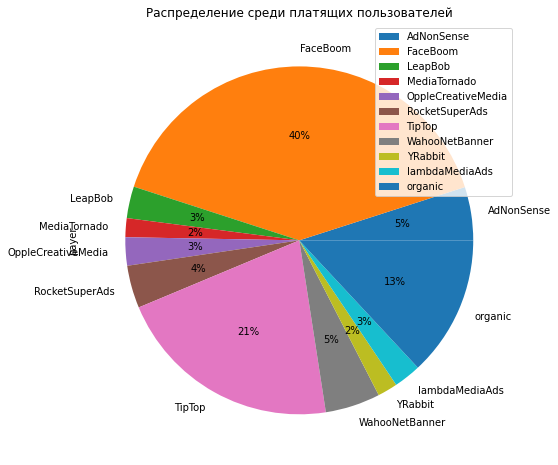

In [29]:
payer_pie('channel')

**Вывод**

Мы визуализировали соотношение платящих и неплатящих пользователей в разрезе региона, устройств и канала привлечения:
США является лидером не только по количеству пользователей, но и демонстрирует лучший показатель по доле платящих пользователей среди них: 6.9%, в остальных странах доли примерно одинаковые в диапазоне от 3,7 до 4,1%, таким образом получается, что 78% платящих пользователей из США.
Доли платящих пользователей в разрезе устройств распределены достаточно равномерно, доля платящих находится в диапазоне от 5 до 6,3% от общего количества пользователей, среди них 38% платящих пользователей ипользуют iPhone, учитывая долю Mac, получается устройства Apple охватывают 60% платящих пользователей приложения.
Что касается распределения по каналам привлечени, то самым эффективным источником по привлечению платящих пользователей является FaceBoom, более 12% пользователей пришедших в приложение из этого приложения оплатили заказ. Лидер по количеству привлеченных пользователей TipTop только на 4 месте с долей 10,4%, таким образом 40% всех платящих пользователей пришли из FaceBoom, TipTop - 21% и на третьем месте органические пользователи - 13%, рассмотрим затраты на рекламу и сопоставим со статистикой платящих пользователей

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [30]:
profiles['acquisition_cost'].sum()

105497.29999999999

In [31]:
profiles.pivot_table(
index='channel', values='acquisition_cost', aggfunc='sum'
).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Ожидаемо, источник, который привел наибольшее количество пользователей, является и лидером затрат на рекламу, рассмотрим затраты в разрезе количества привлеченных пользователей с оценкой средней стоимости

Постоим график динамики затрат на привлечение пользователей по дням

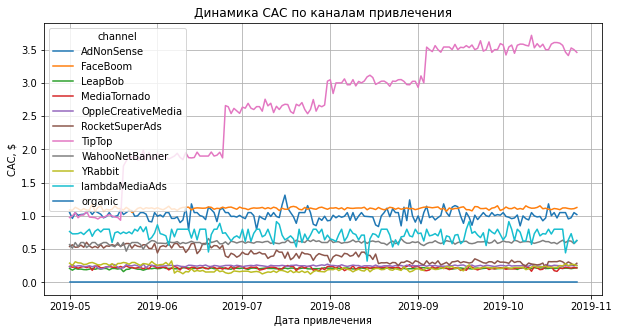

In [32]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Постоим график динамики затрат на привлечение пользователей по месяцам

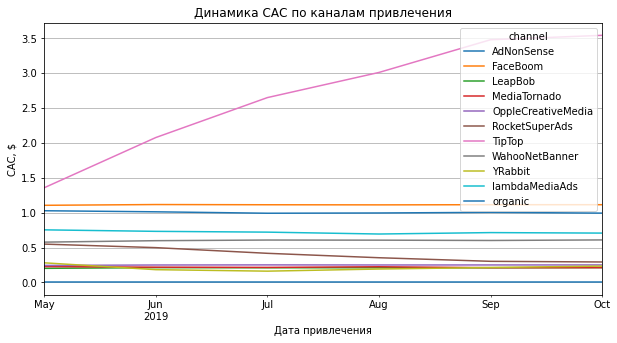

In [33]:
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

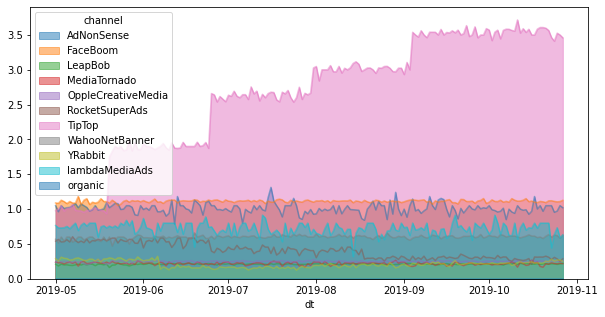

In [34]:
 
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot.area(stacked=False, figsize=(10, 5));

In [35]:
profiles.groupby('channel').agg({'user_id':'count', 'acquisition_cost': 'mean', }).sort_values(by='acquisition_cost', ascending=False)

,user_id,acquisition_cost
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


Средняя стоимость привлечения одного пользователя через TipTop очень высокая, по сравнению с остальными источниками, учитывая, что 22% пользователей органические и не стоили компании затрат, получается, что реклама через TipTop крайне не эффективная.

**Выводы**

В результате анализа затрат на рекламу установлено, что источник, который привел наибольшее количество пользователей, является и лидером затрат на рекламу, поэтому мы проанализировали затраты по источникам в разрезе количества привлеченных пользователей с оценкой средней стоимости, для оценки окупаемости.

Средняя стоимость привлечения одного пользователя через TipTop очень высокая, по сравнению с остальными источниками, учитывая, что 22% пользователей органические и не стоили компании затрат, получается, что реклама через TipTop крайне неэффективная. Рекомендуется сократить до минимума затраты на этот источник.

В оцениваемом периоде затраты на рекламу по всем источникам, кроме TipTop, распределены равномерно, в то время как затраты на рекламу TipTop ежемесячно росли.


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 


In [37]:
profiles = profiles.loc[profiles['channel'] != 'organic']

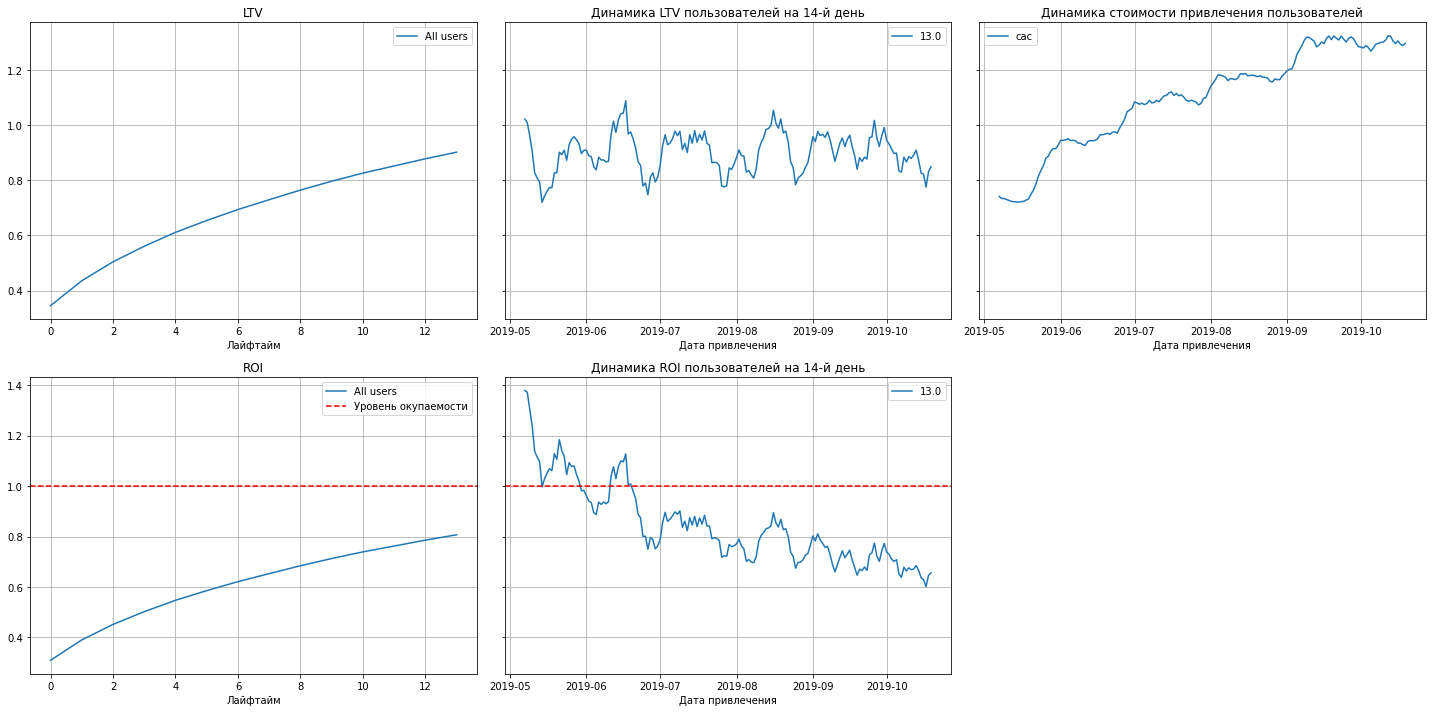

In [38]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Очевидно, что расходы на рекламу, резко снизили рентабельность, ROI ниже уровня окупаемости, к тому же в начале июня 2019, когда резко выросла стоимость привлечения пользователей, такой же резкий но спад мы видим на графике динамики ROI

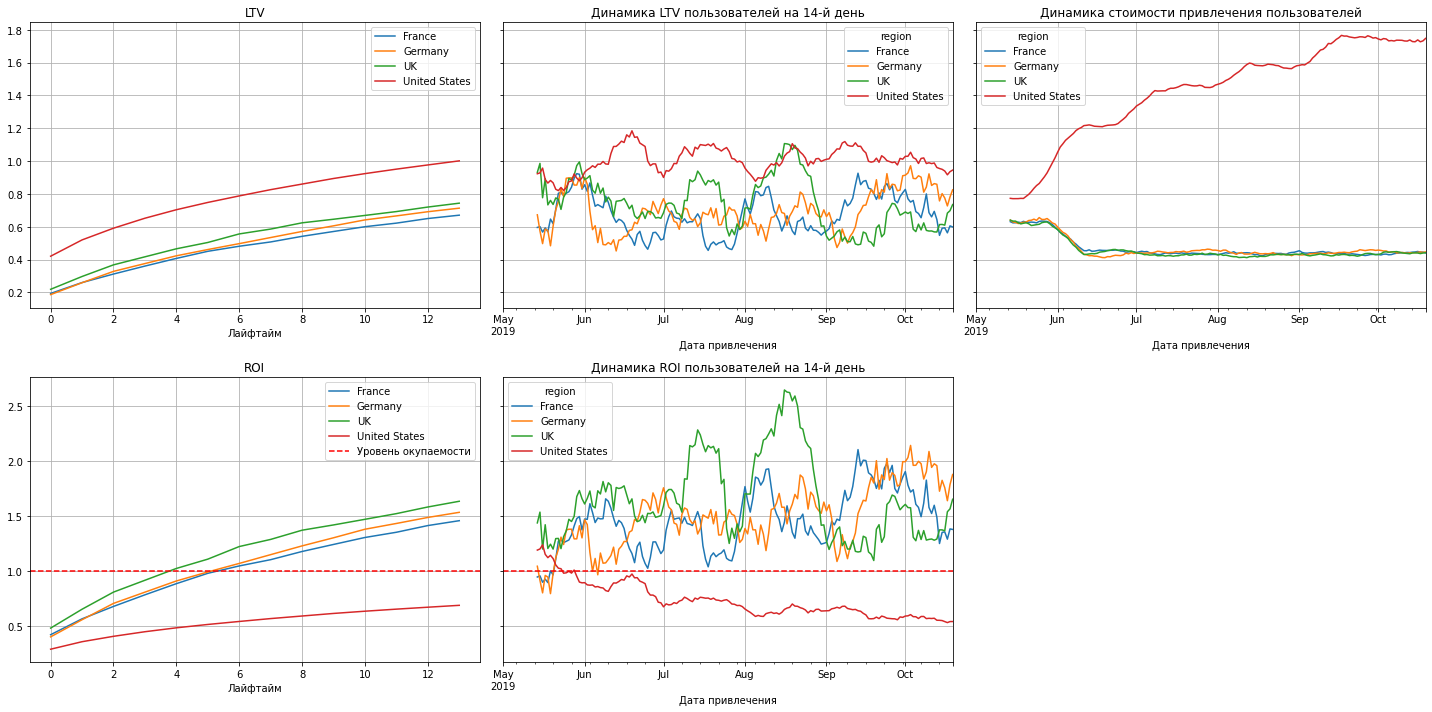

In [39]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Судя по графикам, затраты на привлечения пользователей окупаются во всех странах кроме США

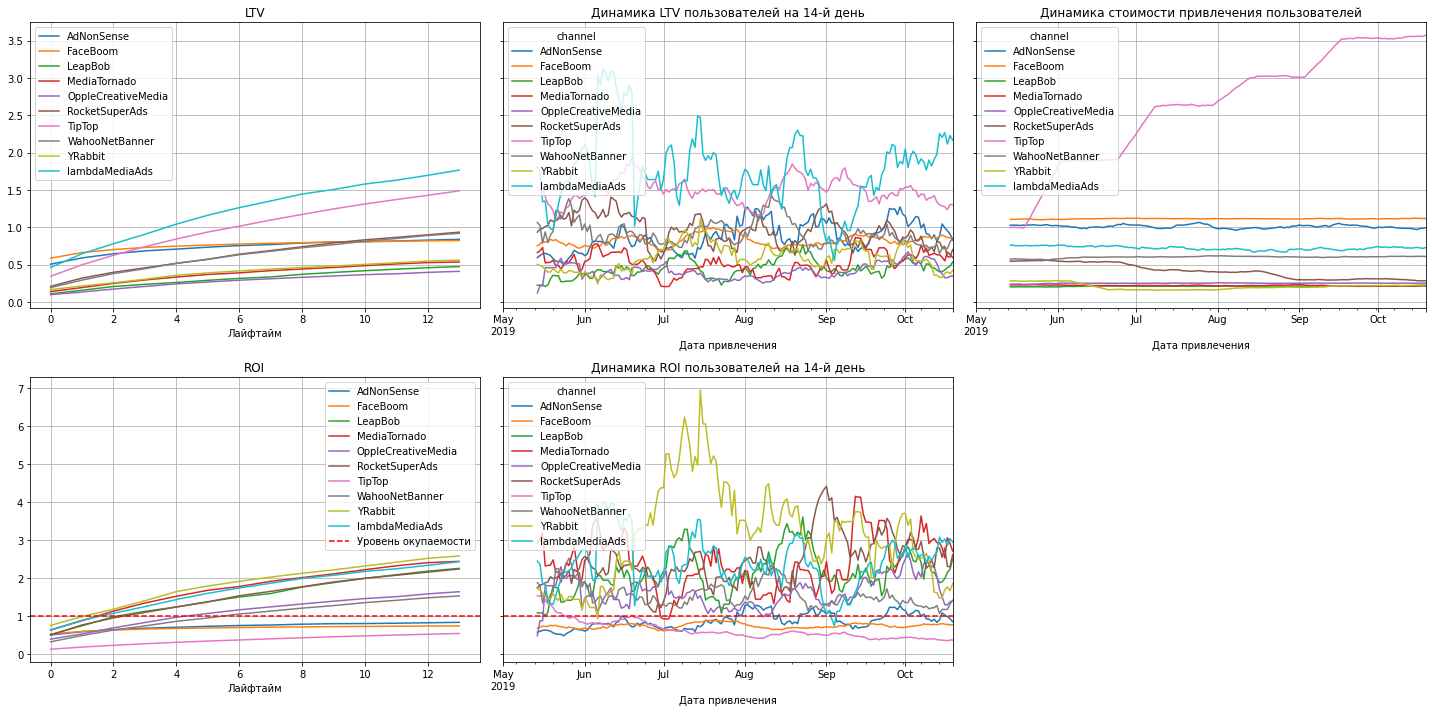

In [40]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Реклама TipTop, FaceBoom, AdNonsence не окупается

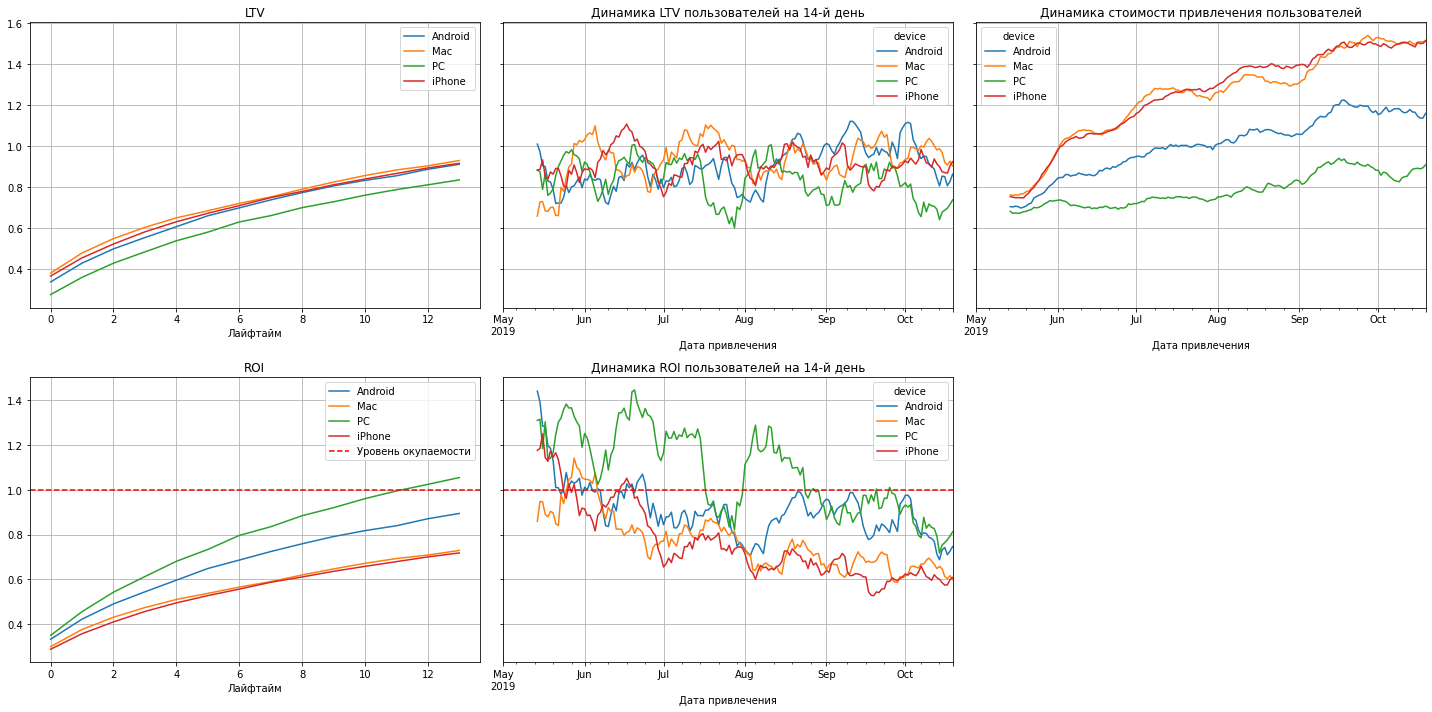

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи устройств Mac, iPhone не окупаются

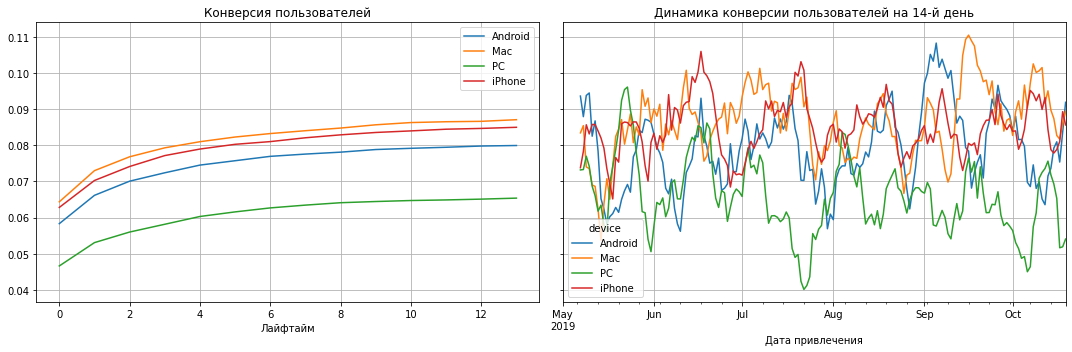

In [42]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

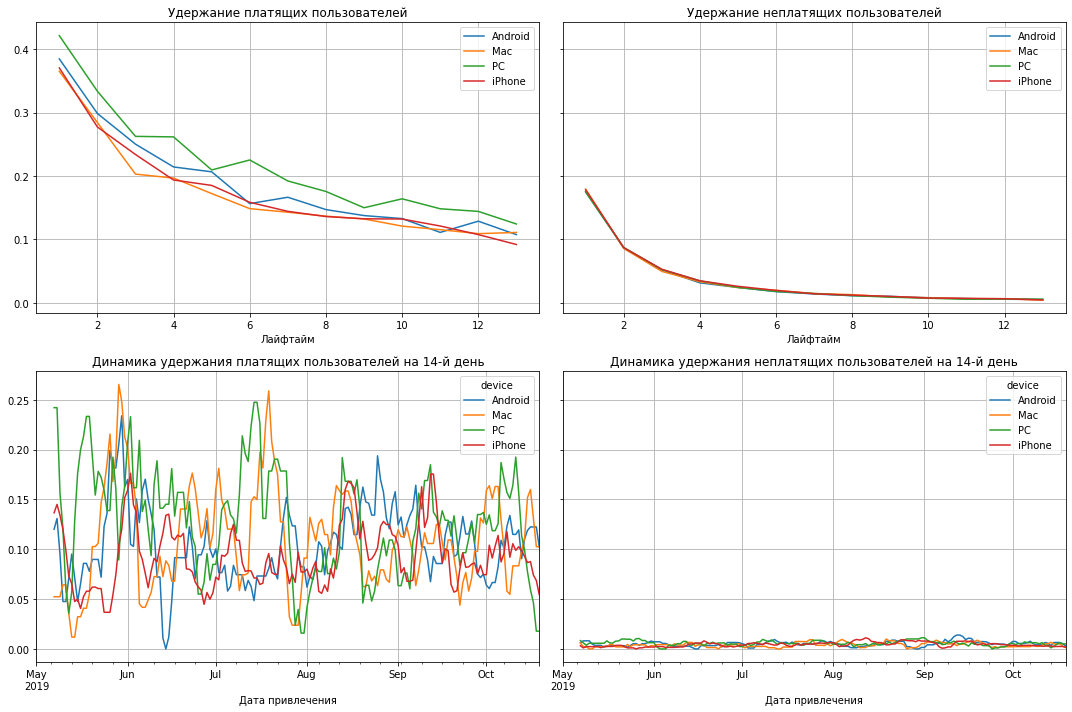

In [43]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

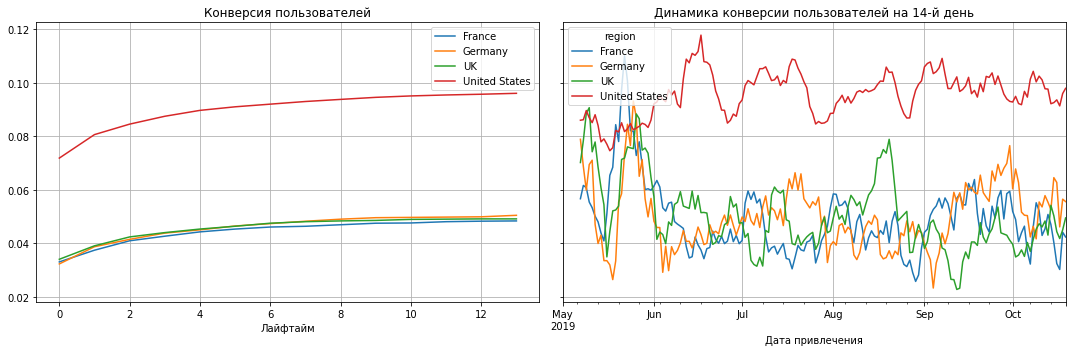

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

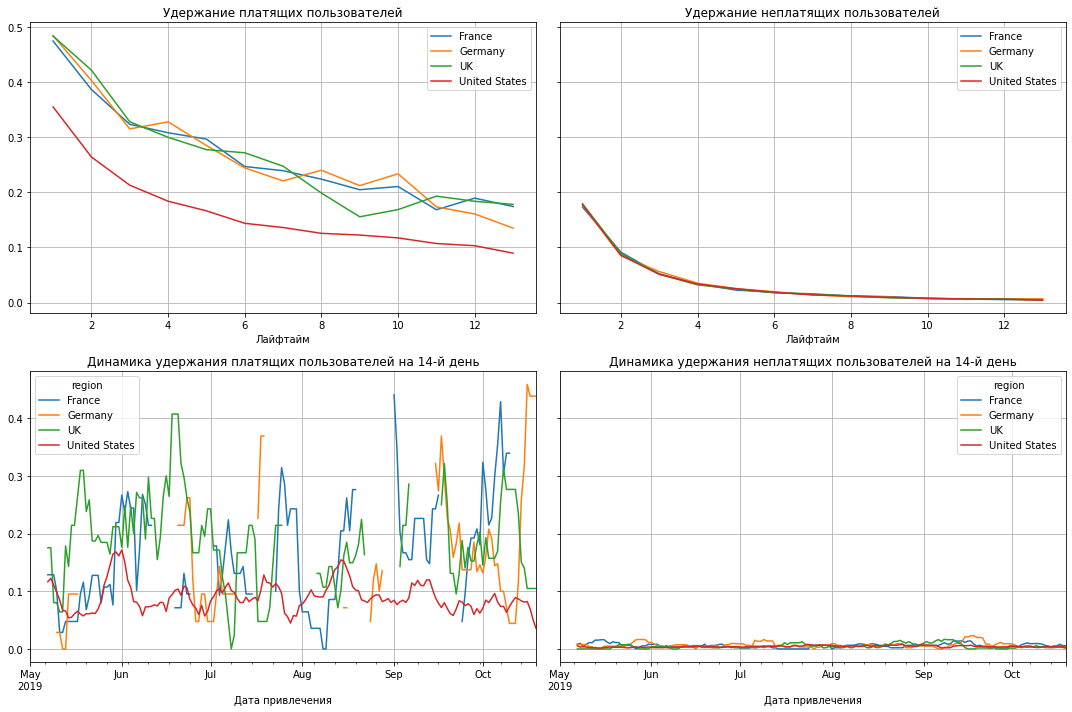

In [45]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Очевидно есть проблемы с удержанием пользователей из США

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

## Итоговые выводы
Выполнена проверка входных данных, пропуски и дубликаты отсутствуют, были преобразованны типы данных времени для возможности корректного анализа.

По итогам анализа мы выяснили, что большинство пользователей приложения из США - 69,57%, 36,35% пользователей используют iPhone и 19,89% Mac (устройства от Apple в совокупности - более 56%), 32,38% пользователей привлечены с помощью TipTop, 11,77% FaceBoom, но целых 22% пришли в приложение самостоятельно, очень высокий показатель органических пользователей.

Мы визуализировали соотношение платящих и неплатящих пользователей в разрезе региона, устройств и канала привлечения: США является лидером не только по количеству пользователей, но и демонстрирует лучший показатель по доле платящих пользователей среди них: 6.9%, в остальных странах доли примерно одинаковые в диапазоне от 3,7 до 4,1%, таким образом получается, что 78% платящих пользователей из США. Доли платящих пользователей в разрезе устройств распределены достаточно равномерно, доля платящих находится в диапазоне от 5 до 6,3% от общего количества пользователей, среди них 38% платящих пользователей ипользуют iPhone, учитывая долю Mac, получается устройства Apple охватывают 60% платящих пользователей приложения. Что касается распределения по каналам привлечени, то самым эффективным источником по привлечению платящих пользователей является FaceBoom, более 12% пользователей пришедших в приложение из этого приложения оплатили заказ. Лидер по количеству привлеченных пользователей TipTop только на 4 месте с долей 10,4%, таким образом 40% всех платящих пользователей пришли из FaceBoom, TipTop - 21% и на третьем месте органические пользователи - 13%, рассмотрим затраты на рекламу и сопоставим со статистикой платящих пользователей

В результате анализа затрат на рекламу установлено, что источник, который привел наибольшее количество пользователей TipTop, является и лидером затрат на рекламу, поэтому мы проанализировали затраты по источникам в разрезе количества привлеченных пользователей с оценкой средней стоимости, для оценки окупаемости.

Средняя стоимость привлечения одного пользователя через TipTop очень высокая (2,8), по сравнению с остальными источниками, например, средняя стоимость привлечения у FaceBoom (второй источник по величине затрат) - почти в три раза ниже, учитывая, что 22% пользователей органические и не стоили компании затрат, получается, что реклама через TipTop крайне неэффективная.

В оцениваемом периоде затраты на рекламу по всем источникам, кроме TipTop, распределены равномерно, в то время как затраты на рекламу TipTop ежемесячно росли.

Расходы на рекламу, резко снизили рентабельность, ROI ниже уровня окупаемости, к тому же в начале июня 2019, когда резко выросла стоимость привлечения пользователей, такой же резкий но спад мы видим на графике динамики ROI;
Затраты на привлечения пользователей окупаются во всех странах кроме США;
Реклама TipTop, FaceBoom, AdNonsence не окупается;
Пользователи устройств Mac, iPhone не окупаются, а они в совокупности составляют более половины всех пользователей приложения;
Очевидно есть проблемы с удержанием пользователей из США.

**Рекомендации:**

Основаная причина неэффективности привлечения пользователей, слишком высокая стоимость рекламы из  TipTop, FaceBoom. Затраты на рекламу TipTop стали, на мой взгляд основной причиной падения рентабельности. Стоит также обратить внимание на удержание пользователей из США, в этой стране основное количество пользователей, а показатель удержания значительно ниже остальных, кроме того необходимо обратить внимние, что есть проблемы с удержанием пользователей Mac, iPhone, а в США 56% пользователей выбирают iPhone согласно статистике, возможно есть взаимосвязь и необходимо проверить возможность наличия технических проблем у пользователей этих устройств.

Общие рекомендации: сокращение расходов на рекламу, отказаться, либо существено снизить затраты на рекламу TipTop, FaceBoom, AdNonsence и осуществить проверку технических проблем использования приложения на устройствах Mac, iPhone.
